# HHA550_Diabetes Prediction Dataset

Context

Columns

1) encounter_id: A unique identifier for each encounter or interaction with the healthcare system.
2) patient_nbr: A unique identifier for each patient.
3) race: The race or ethnicity of the patient.
4) gender: The gender of the patient.
5) age: The age of the patient at the time of encounter.
6) weight: The weight of the patient.
7) admission_type_id: Identifier for admission type (e.g., emergency, urgent, elective).
8) discharge_disposition_id: Identifier for discharge disposition (e.g., home, transfer, expired).
9) admission_source_id: Identifier for admission source (e.g., physician referral, emergency room).
10) time_in_hospital: Number of days the patient spent in the hospital during this encounter.
11) payer_code: Code for the payer (e.g., insurance company) responsible for covering the cost of the encounter.
12) medical_specialty: The specialty of the physician who admitted the patient.
13) num_lab_procedures: Number of lab procedures the patient underwent during the encounter.
14) num_procedures: Number of non-lab procedures the patient underwent during the encounter.
15) num_medications: Number of distinct medications the patient was prescribed during the encounter.
16) number_outpatient: Number of outpatient visits the patient had in the year preceding the encounter.
17) number_emergency: Number of emergency visits the patient had in the year preceding the encounter.
18) number_inpatient: Number of inpatient visits the patient had in the year preceding the encounter.
19) diag_1, diag_2, diag_3: Primary, secondary, and tertiary diagnoses respectively.
20) number_diagnoses: Number of diagnoses entered to the system.
21) max_glu_serum: Indicates the result of the max glucose serum test.
22) A1Cresult: Indicates the result of the A1C test.
23) metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone: These columns likely represent different medications, with values indicating whether the patient was prescribed these medications during the encounter.
24) change: Indicates if there was a change in diabetic medications.
25) diabetesMed: Indicates if there was any diabetic medication prescribed.
26) readmitted: Indicates if the patient was readmitted to the hospital within 30 days of the encounter.


In [ ]:
#!pip install seaborn
#!pip install missingno
#!pip install xgboost
#!pip install catboost
#!pip install regex
#!pip install sklearn
#!pip install pandas
#!pip install numpy
#!pip install imblearn
#!pip install lightgbm

# Importing

In [2]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")
# had trouble installing sklearn so I removed it

# Loading the data

In [4]:
df = pd.read_csv("diabetic_data.csv")

In [5]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [28]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [29]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Starting to fix missing data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [31]:
#Checking for missing data
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
max_glu_serum,96420,0.947468
A1Cresult,84748,0.832773
encounter_id,0,0.000000
nateglinide,0,0.000000
glimepiride,0,0.000000
acetohexamide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000


<Axes: >

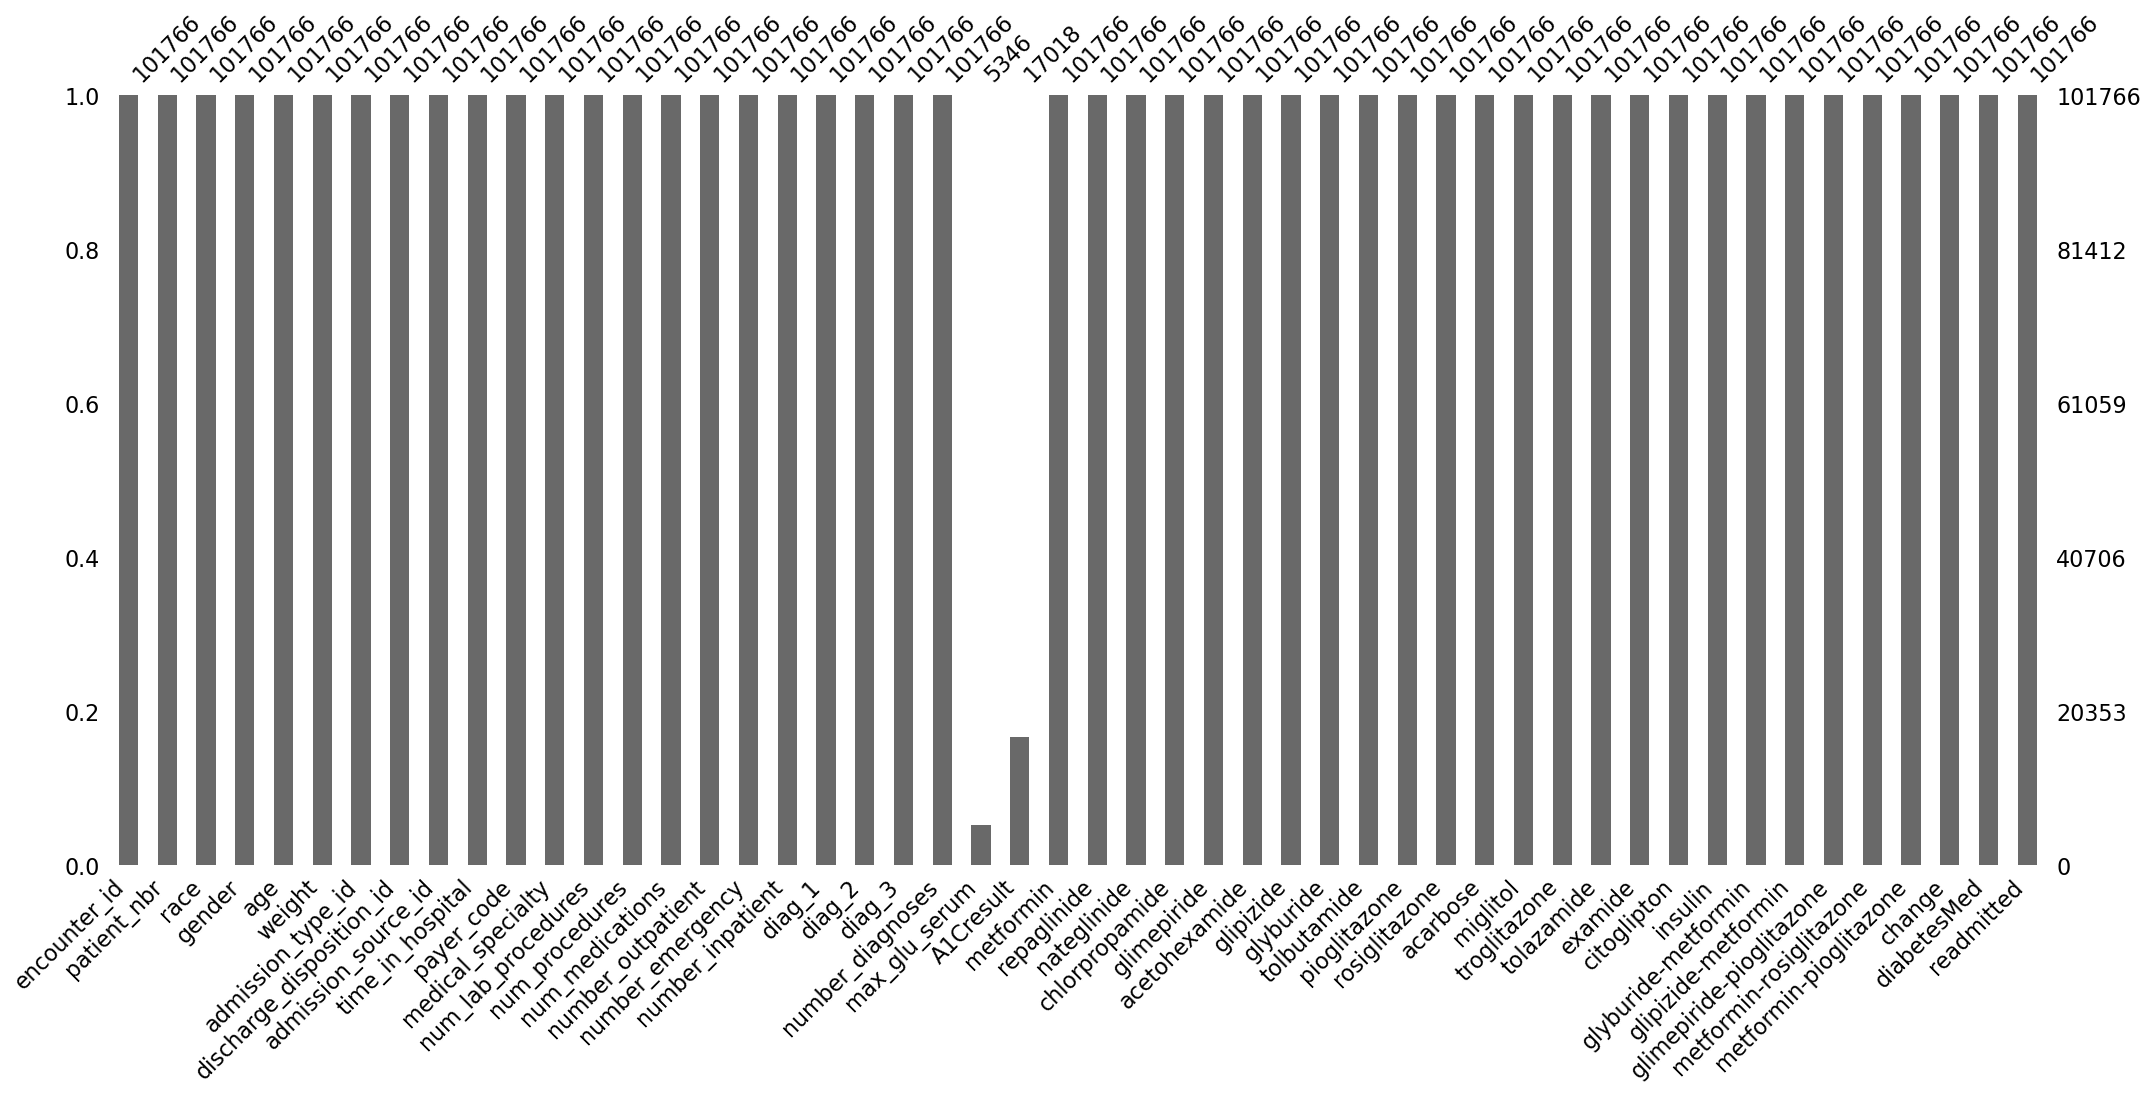

In [34]:
# Visualizing the missing data to get more idea
msno.bar(df)

# Cleaning the data

### Checking for duplicates

In [35]:
df.duplicated().sum()

0

This code allows us to see how many times "?" appears in each column. I would consider "?" to be missing data as well.

In [58]:
m=df.eq('?').sum()
pd.DataFrame([m.values],columns=m.index)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,2273,0,0,98569,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This code replaces the "?" with NaN values so they are considered missing

In [68]:
#df.replace('?', "", inplace=True)
df.replace("?", np.nan, inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [69]:
#Checking for missing data again
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
weight,98569,0.968585
max_glu_serum,96420,0.947468
A1Cresult,84748,0.832773
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
encounter_id,0,0.000000


In [70]:
df.dropna(inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


This causes everything to be removed, so we will go back to before. 

In [3]:
df = pd.read_csv("diabetic_data.csv")

In [6]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#Checking for missing data
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
max_glu_serum,96420,0.947468
A1Cresult,84748,0.832773
encounter_id,0,0.000000
nateglinide,0,0.000000
glimepiride,0,0.000000
acetohexamide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000


In [8]:
df.dropna(inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,2521974,80499960,Caucasian,Male,[80-90),?,6,3,7,5,...,No,No,No,No,No,No,No,No,No,<30
192,2595612,89193870,Caucasian,Female,[40-50),?,6,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
460,4084524,76959585,AfricanAmerican,Female,[70-80),?,6,1,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,>30
593,4804968,114960726,Caucasian,Female,[50-60),?,6,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
696,5319174,87847776,Other,Male,[70-80),?,6,6,7,11,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,424989572,103832127,Caucasian,Male,[60-70),?,2,1,1,6,...,No,No,No,No,No,No,No,No,Yes,<30
100493,426670736,101755908,Caucasian,Female,[40-50),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,NO
100578,427875206,90285327,Caucasian,Female,[60-70),?,1,2,7,4,...,No,No,No,No,No,No,No,No,No,NO
101029,433822712,104106645,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,Ch,Yes,>30


In [9]:
#Checking for missing data
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
encounter_id,0,0.0
troglitazone,0,0.0
chlorpropamide,0,0.0
glimepiride,0,0.0
acetohexamide,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0


<Axes: >

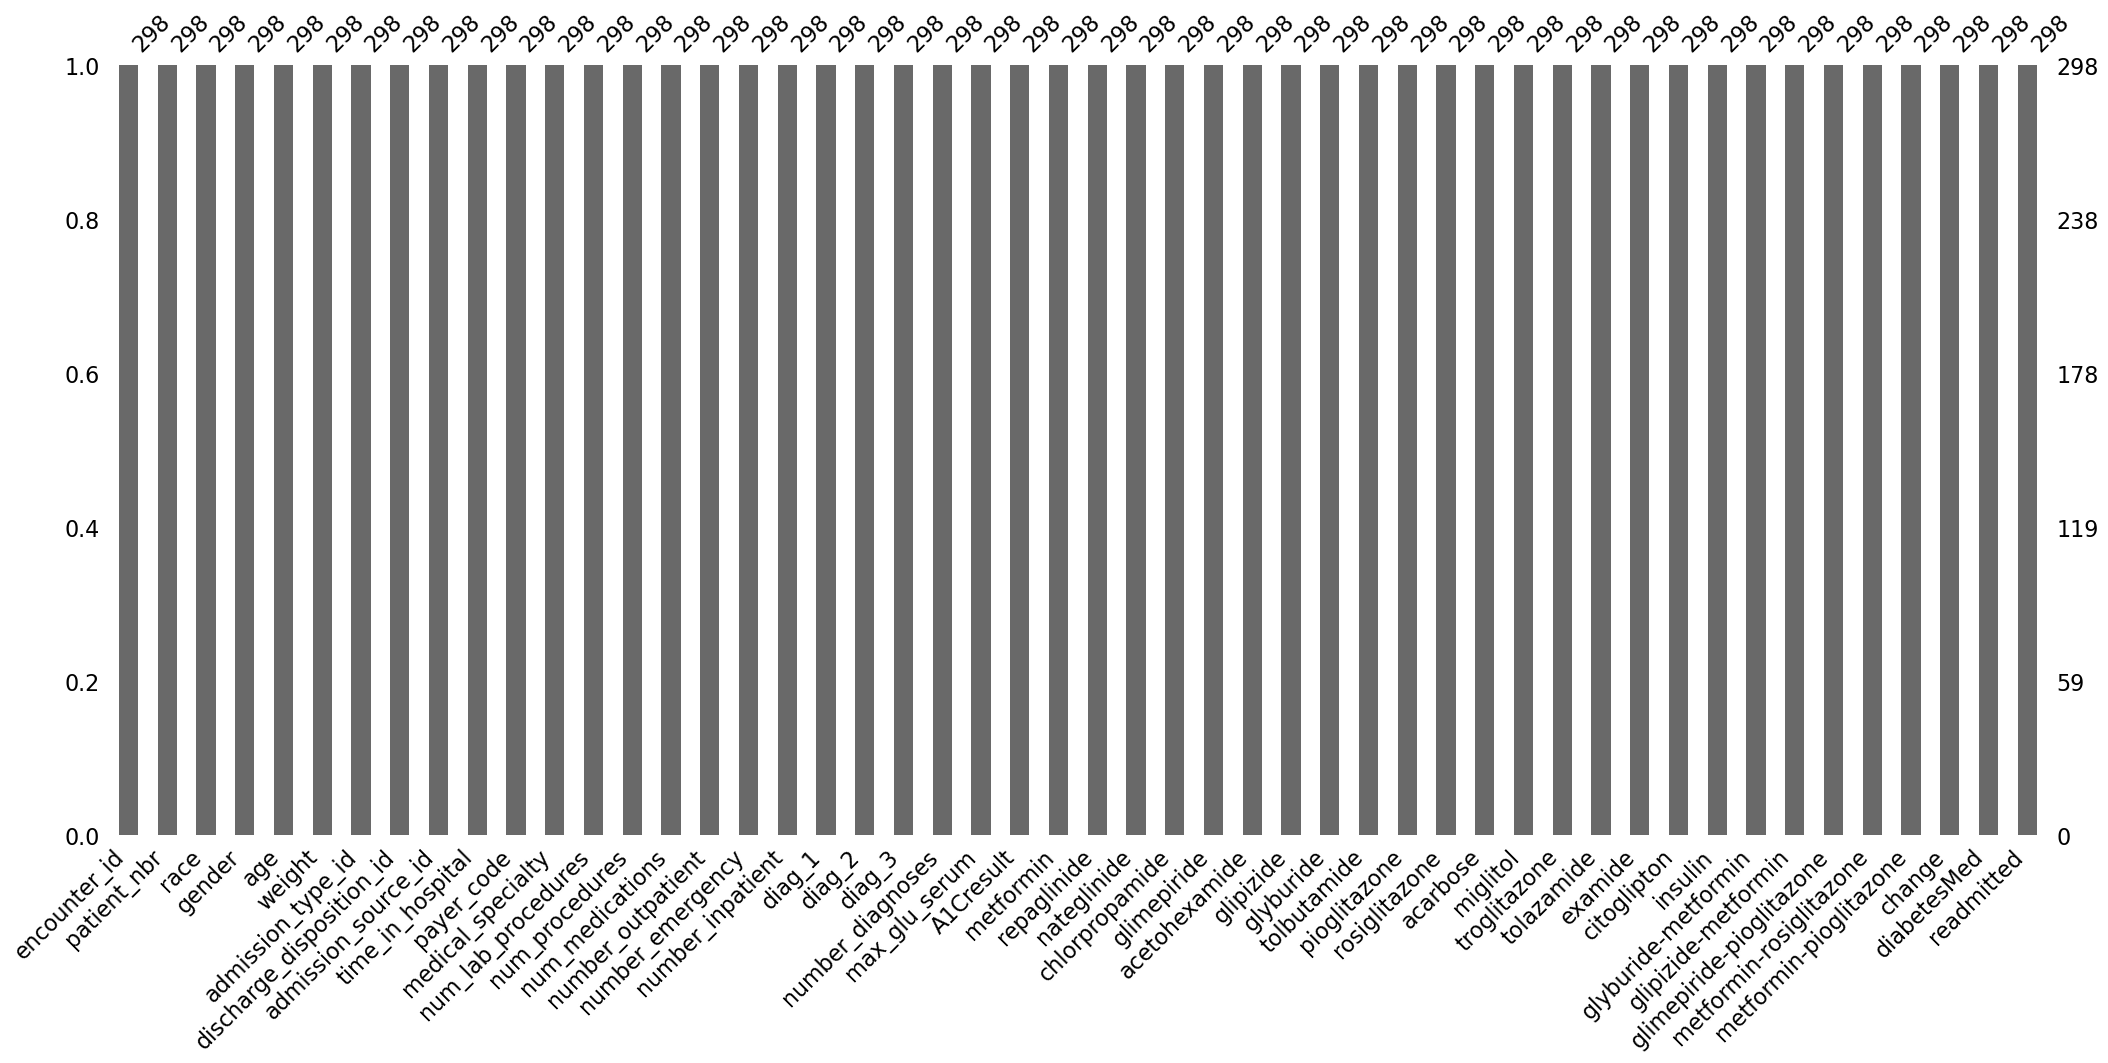

In [10]:
msno.bar(df)

Instead, another method we could use is to just drop all the columns with missing data

In [6]:
# Dropping
df.drop(['encounter_id', 'patient_nbr', 'weight', 'max_glu_serum', 'A1Cresult'], axis = 1, inplace = True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
m=df.eq('?').sum()
pd.DataFrame([m.values],columns=m.index)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2273,0,0,0,0,0,0,40256,49949,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#df.replace('?', "", inplace=True)
df.replace("?", np.nan, inplace=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,NaN,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,NaN,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,MC,NaN,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
#Checking for missing data again
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
tolazamide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000
rosiglitazone,0,0.000000


In [10]:
df.dropna(inplace=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,Caucasian,Female,[70-80),1,22,7,7,MC,Orthopedics-Reconstructive,58,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
20737,Caucasian,Female,[60-70),2,1,1,3,MC,Nephrology,59,...,No,Steady,No,No,No,No,No,No,Yes,NO
20824,Caucasian,Female,[90-100),1,1,7,4,MC,Emergency/Trauma,56,...,No,No,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,[70-80),1,2,7,10,MC,InternalMedicine,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
23879,Caucasian,Female,[70-80),1,3,6,12,UN,InternalMedicine,77,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,[70-80),2,6,7,6,MC,Emergency/Trauma,46,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101743,Caucasian,Male,[80-90),1,13,7,3,MC,Emergency/Trauma,45,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101747,Caucasian,Female,[70-80),1,22,7,8,MC,InternalMedicine,51,...,No,Steady,No,No,No,No,No,No,Yes,>30
101749,Caucasian,Female,[70-80),3,6,1,3,MC,Orthopedics,27,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
#Checking for missing data again
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
race,0,0.0
glimepiride,0,0.0
glipizide,0,0.0
glyburide,0,0.0
tolbutamide,0,0.0
pioglitazone,0,0.0
rosiglitazone,0,0.0
acarbose,0,0.0
miglitol,0,0.0
troglitazone,0,0.0


In [12]:
df.sample(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
81257,Caucasian,Male,[70-80),1,1,7,4,MC,InternalMedicine,49,...,No,No,No,No,No,No,No,Ch,Yes,NO
30938,Caucasian,Female,[60-70),2,1,1,1,HM,Cardiology,46,...,No,No,No,No,No,No,No,Ch,Yes,NO
98043,Hispanic,Male,[60-70),1,1,1,5,MD,InternalMedicine,47,...,No,Steady,No,No,No,No,No,No,Yes,NO
27168,Caucasian,Female,[70-80),1,1,7,6,MC,InternalMedicine,71,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
94167,Caucasian,Female,[80-90),2,1,7,4,MC,Emergency/Trauma,56,...,No,Steady,No,No,No,No,No,No,Yes,NO
31991,Caucasian,Female,[80-90),2,3,1,11,MC,Family/GeneralPractice,58,...,No,No,No,No,No,No,No,Ch,Yes,NO
42478,AfricanAmerican,Female,[50-60),3,1,1,4,BC,Cardiology,43,...,No,Up,No,No,No,No,No,Ch,Yes,>30
27315,AfricanAmerican,Male,[50-60),1,1,7,2,HM,InternalMedicine,67,...,No,Steady,No,No,No,No,No,No,Yes,NO
61608,Caucasian,Male,[80-90),1,3,7,4,MC,Cardiology,76,...,No,Steady,No,No,No,No,No,No,Yes,NO
46785,Caucasian,Female,[70-80),2,3,7,9,MC,Emergency/Trauma,34,...,No,Down,No,No,No,No,No,Ch,Yes,<30


Now we have a decent amount of data with no missing data at all

## Univariate Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26755 entries, 20446 to 101764
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      26755 non-null  object
 1   gender                    26755 non-null  object
 2   age                       26755 non-null  object
 3   admission_type_id         26755 non-null  int64 
 4   discharge_disposition_id  26755 non-null  int64 
 5   admission_source_id       26755 non-null  int64 
 6   time_in_hospital          26755 non-null  int64 
 7   payer_code                26755 non-null  object
 8   medical_specialty         26755 non-null  object
 9   num_lab_procedures        26755 non-null  int64 
 10  num_procedures            26755 non-null  int64 
 11  num_medications           26755 non-null  int64 
 12  number_outpatient         26755 non-null  int64 
 13  number_emergency          26755 non-null  int64 
 14  number_inpatient      

In [20]:
numerical = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 
             'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient', 
             'number_diagnoses']
categorical = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
               'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 
               'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

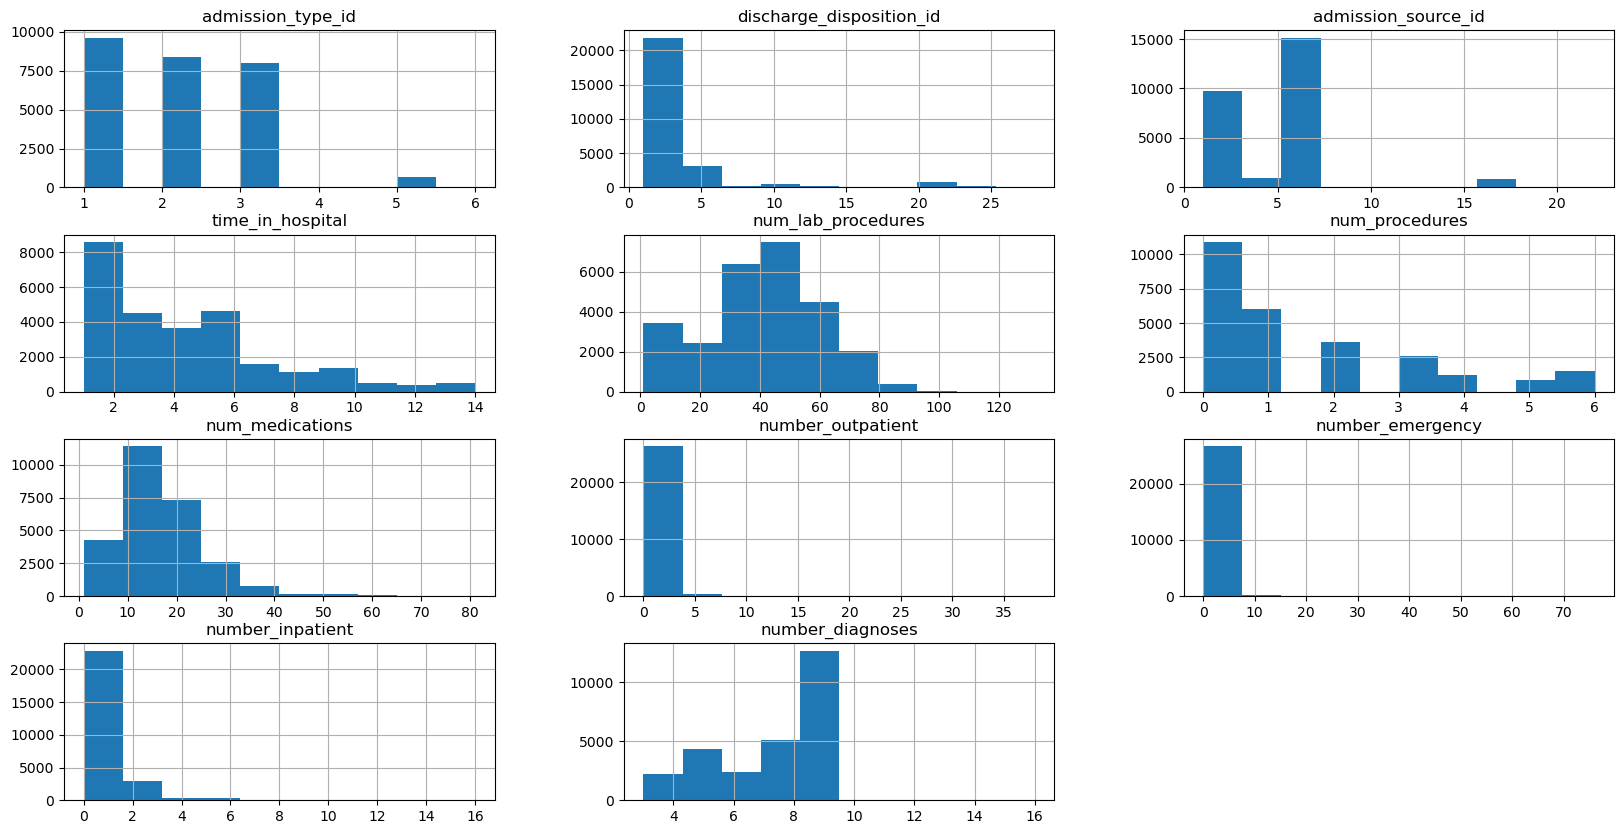

In [21]:
df[numerical].hist(figsize=(20,10));

In [22]:
df[numerical].skew()

admission_type_id            0.709268
discharge_disposition_id     3.369570
admission_source_id          0.809462
time_in_hospital             1.125305
num_lab_procedures          -0.228932
num_procedures               1.205889
num_medications              1.481855
number_outpatient            7.664487
number_emergency            20.650788
number_inpatient             3.807832
number_diagnoses            -0.625540
dtype: float64